# TEWA 1 tutorial

## simulating  and fitting linear regression models

## single predictor and multiple predictors

## calculating model predicition error


##  resampling for regression uncertainty






In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, linalg

## simulating data based on a regression model

equation for the predicted line:
Ypred=B<sub>0</sub>+B<sub>1</sub>*X

equation for the data simulation:
Y=B<sub>0</sub>+B<sub>1</sub>*X+Error

the example from the lecture, we are trying to predict the price of apartment, based on the age of the house 
 below, we create some data X

 houses, ages between 0 and 200 years

In [74]:
n = 150 # number of data points
x = np.random.randint(0, 200, n)
b_0 = 500_000 
b_1 = - 1_000
sd = 100_000
err = np.random.normal(0, scale = sd, size=n)

for the above data, simulate apartment prices for the 150 houses, with a linear regression model, we know that
1. a brand new apartment costs  500 000 €
2. the error in the model should have SD of 100 000 €
3. for each additional year, the price is lower with 1000 €


In [75]:
y = np.array([b_0 + b_1 * x[i] + err[i] for i in range(n)])

1. visualize the above data with a scatter plot
2. add labels for the axes

Text(0.5, 0, 'Age')

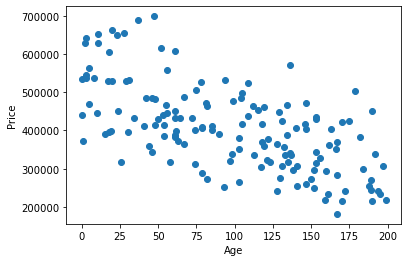

In [76]:
plt.scatter(x,y)
plt.ylabel("Price")
plt.xlabel("Age")

## fitting a regression line

now we can try to fit a least squares regression  to tha above data, using lingalg.lstsq()

as discussed in the lecture, this requires adding a column of ones to the predictor variable  (the reason for this is that regression models, are calcualted as a matrix- vector multiplication)

In [77]:
x_n = np.stack([x,np.ones(n)], axis=1)

coeff,total_error,_,_ = linalg.lstsq(x_n,y)

the first argument that is returned by lstsq is the most important one for us now, print it out (it should contain two values)
the 2nd argument is the residual (error), print it out as well

In [78]:
coeff

array([ -1245.75643347, 527283.45988621])

In [79]:
y_pred = np.array([coeff[1] + coeff[0] * x[i] for i in range(n)])

In [80]:
total_error

1108315941134.995

you can hopefully observe that we got similar values to what we created the data with, but not exactly the same


## visualizing the regression line
1. use again the scatter plot to visualize the age to price data, as before,
2. add the regression line (red), based on the result of the lstsq()

this can be done, using plt.plot, but you will need some care how you include the values in X (as they are in random order)

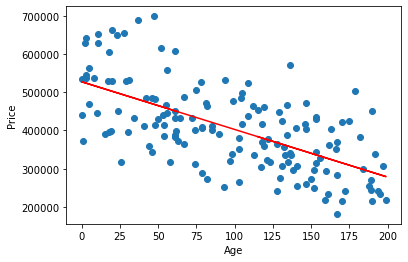

In [81]:
plt.scatter(x,y)
plt.ylabel("Price")
plt.xlabel("Age")
plt.plot(x,y_pred, c="red")

## calculate the residuals and the total error for the fitted model

In [82]:
res = (y_pred - y)**2
total_error_manually = np.sum(res)
total_error_manually

1108315941134.9946

compare what you calculated with the output of linalg.lstsq

In [83]:
total_error

1108315941134.995

### advanced 1
## Bootstrapping for a confidence interval in the regression line 
resample the data with replacement and visualize the obtained confidence interval for the regression line

CPU times: user 873 ms, sys: 26.6 ms, total: 899 ms
Wall time: 226 ms


Text(0.5, 0, 'Age')

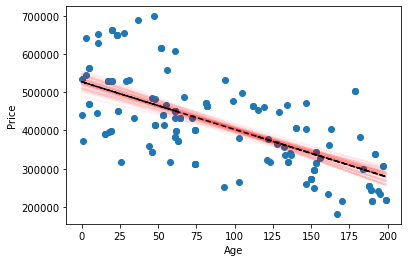

In [84]:
%%time

n_sim=100

for i in range(n_sim,n):

    boostrapped_idx = np.random.choice(n,n)
    boostrapped_x = np.array([x[i] for i in boostrapped_idx])
    boostrapped_y = np.array([y[i] for i in boostrapped_idx])
    boostrapped_x_n = np.stack([boostrapped_x,np.ones(n)], axis=1)
    coeff,total_error,_,_ = linalg.lstsq(boostrapped_x_n,boostrapped_y)
    boostrapped_y_pred = np.array([coeff[1] + coeff[0] * boostrapped_x[i] for i in range(n)])


    plt.plot(boostrapped_x,boostrapped_y_pred, c="red", alpha=0.05)

plt.scatter(boostrapped_x,boostrapped_y)
plt.plot(x,y_pred, c="black", linestyle="--")
plt.ylabel("Price")
plt.xlabel("Age")

/home/user/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

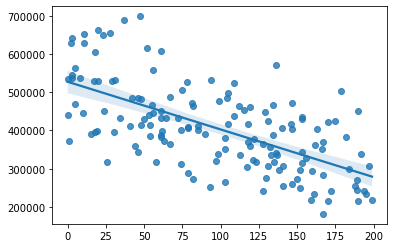

In [85]:
import seaborn as sns

sns.regplot(x,y)

### advanced 2

### hypothesis test with randomization

is the relationship between age and price different from chance? 
use randomization to simulate 1000 slope under the null hypothesis of **no relationship**



0.00% of the cases show a slope of -1355.1070274810384 or lower.



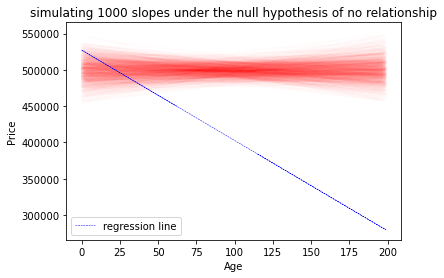

In [89]:
n_sim_slope = 1000
n = 150 # number of data points
b_0 = 500_000 
b_1 = 0
sd = 100_000

def sim_slopes(n_sim_slope, n, b_0, b_1, sd):
    slopes=list()
    for i in range(n_sim_slope):
        x = np.random.randint(0, 200, n)
        err = np.random.normal(0, scale = sd, size=n)
        y = np.array([b_0 - b_1 * x[i] + err[i] for i in range(n)])
        x_n = np.stack([x,np.ones(n)], axis=1)
        coeff,total_error,_,_ = linalg.lstsq(x_n,y)
        y_pred = np.array([coeff[1] + coeff[0] * x[i] for i in range(n)])
        plt.plot(x,y_pred, c="red", alpha=0.0075)
        slopes.append(coeff[0])
        
    return slopes
    
slopes = sim_slopes(n_sim_slope, n, b_0, b_1, sd)
plt.plot(x,y_pred, c="blue", linestyle="--", lw=0.5, label="regression line")
plt.ylabel("Price")
plt.xlabel("Age")
plt.title("simulating 1000 slopes under the null hypothesis of no relationship")
plt.legend()
print(f"\n{sum(slopes <= coeff[0])/n_sim_slope:.2%} of the cases show a slope of {coeff[0]} or lower.\n")

## Simulating data with a regression model with two predictors
of course our model of apartment prices is limited, since there are many other factors influencing the price,
probably the most important one is the size of the aparment.
1. make an additonal predictor, the size, that ranges from 20 to 200 m<sup>2</sup> with uniform random values 
2. we know that for each additonal m<sup>2</sup>, the price increases with 2000 €
3. simulate a new price data-set, that has 2 predictors, age as above, and size as defined here

4. the error should stay the same, but it makes sense to have a lower intercept value of 300 000 €  (why?)


In [90]:
n = 150
x_sqm = np.random.uniform(20,200,size=n)
x_age = np.random.randint(0, 200, n)
b_0 = 300_000 # lower, because this is the unrealistic value for a brandnew 0 m² flat
b_1 = - 1_000
b_2 = - 2_000
sd = 100_000
err = np.random.normal(0, scale = sd, size=n)

y = np.array([b_0 + b_1 * x_age[i] + b_2 * x_sqm[i] + err[i] for i in range(n)])

visualize the data-set , 
1. make a figure with 2 subplots horizontally arrarnged (1 for each predictor), scatter plots again
2. make a new figure, with age on the x axis, and the size of the dots in the scatter plot should be proportional to the size of the aparment (parameter s of scatter)



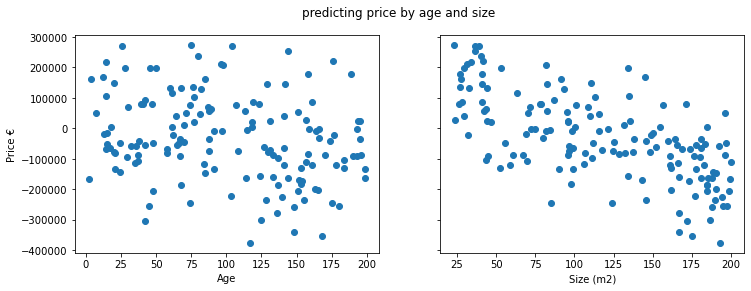

In [91]:
plt.subplots(1,2, figsize=(12,4),sharey=True)
plt.suptitle("predicting price by age and size");
plt.subplot(1,2,1)
plt.scatter(x_age,y)
plt.xlabel('Age')
plt.ylabel('Price €')
plt.subplot(1,2,2)
plt.scatter(x_sqm,y)
plt.xlabel('Size (m2)');

showing both factors on single figure  (size or color as a new dimension)

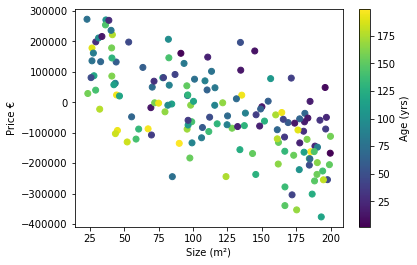

In [92]:
plt.figure()
plt.scatter(x_sqm,y,c=x_age)
plt.xlabel('Size (m²)')
plt.ylabel('Price €')
plt.colorbar(label="Age (yrs)")

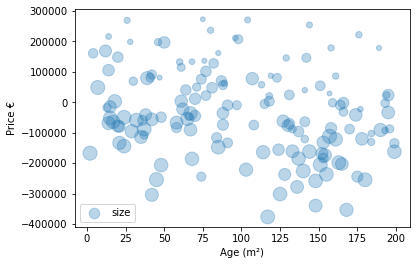

In [98]:
plt.figure()
plt.scatter(x_age,y,s=x_sqm, alpha=0.3, label="size")
plt.xlabel('Age (m²)')
plt.ylabel('Price €')
plt.legend(loc="lower left")

 
### fit a linear regression model with intercept and the two predictors using scipy.linalg to the above data

#### calculate the error of the model






In [ ]:
# YOUR CODE

fit 2 regressions to the above data

1. only intercept and age as predictors
2. only intercept and price as predictors

compar the obtained errors and weigths(slopes) with the one obtained with using two predictors.




###  write a  function to perform the above calculation MyMultRegr()
this function should take 3 inputs in the following order 1. predictor1 (age), 2. predictor (size),  3. outcome variable (price) 

your function has to
1.  create a predictor matrix (as above), starting with a column of ones, and the two predictors. (3 columns in total)
2. use lstsq () to fit the regression model, as above
3. the function should return 2 outputs, the 1st one is an array containing the 3 fitted regression parameters (1st output argument of lstsq()) , 2nd output should be the residual error (2nd output argument of lstsq()),

!! make sure that your function works for inputs of any size (this is important when you add the column of ones), (but you can assume that all of the 3 input vectors have the same length (otherwise the analysis does not make sense) 





In [ ]:
# YOUR CODE


### standardized predictors

standardize (z-score) your predictors by subtracting the mean and dividing by the standard deviaton.

fit a regression with both the single predictor and the two predictor models and compare error and beta weigths for fitting the model to standardized and non-standardized data-sets



# homework

car price simulation

a new car costs 30 000 euros on average


simulate 200 car prices from the last 70 years, with the assumption that while as cars get older it is cheaper, however very old cars , have a vintage value, that is eventually if the are old enough they could worth more than a new car.


use a standard devation of 10 000 euros



hint: use a linear model for the simualtion with a two predictors, and linear and a quadratic term   



test different values for the two slopes, simulate data, until you manage to simulate realistic car prices, that satisfy the above criteria..






once you found good values for this simulation, make a nice visualization of the simulated data

## this is bonus task- no need to submit 
## reliability of regression analysis
since we created the data, we can see how close are the true values to the 'generative' model
next task is to systematically investigate this relationship
you will have to manipualte the number of datapoints, and the error in the model, and analyze the difference between the data generating and the fitted regression parameters


this task is somewhat analogous to the t-test tutorial


In [ ]:
# YOUR CODE
# YOUR CODE
# YOUR CODE

## solution for previous homework

In [ ]:
def SimulateT_diff(mean1,mean2,sd,numb):
    N=1000
    p_values=np.zeros(N)
    for i in range(N):
        Data1=np.random.normal(mean1,sd,numb)
        Data2=np.random.normal(mean2,sd,numb)
        p_values[i]=stats.ttest_ind(Data1,Data2)[1]
    return np.sum(p_values<.05)/N


SDs=np.linspace(20,200,20)
print(SDs)
Nums=np.linspace(8,64,16)
print(Nums)
Results=np.zeros((len(SDs),len(Nums)))  
print(np.shape(Results))


for c1,sd in enumerate(SDs):
    for c2,n in enumerate(Nums):
        print(c1,c2,sd,n)
        Results[c1,c2]=SimulateT_diff(480,500,sd,int(n))


[ 20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]
[ 8. 16. 24. 32. 40. 48. 56. 64.]
(10, 8)
0 0 20.0 8.0
0 1 20.0 16.0
0 2 20.0 24.0
0 3 20.0 32.0
0 4 20.0 40.0
0 5 20.0 48.0
0 6 20.0 56.0
0 7 20.0 64.0
1 0 40.0 8.0
1 1 40.0 16.0
1 2 40.0 24.0
1 3 40.0 32.0
1 4 40.0 40.0
1 5 40.0 48.0
1 6 40.0 56.0
1 7 40.0 64.0
2 0 60.0 8.0
2 1 60.0 16.0
2 2 60.0 24.0
2 3 60.0 32.0
2 4 60.0 40.0
2 5 60.0 48.0
2 6 60.0 56.0
2 7 60.0 64.0
3 0 80.0 8.0
3 1 80.0 16.0
3 2 80.0 24.0
3 3 80.0 32.0
3 4 80.0 40.0
3 5 80.0 48.0
3 6 80.0 56.0
3 7 80.0 64.0
4 0 100.0 8.0
4 1 100.0 16.0
4 2 100.0 24.0
4 3 100.0 32.0
4 4 100.0 40.0
4 5 100.0 48.0
4 6 100.0 56.0
4 7 100.0 64.0
5 0 120.0 8.0
5 1 120.0 16.0
5 2 120.0 24.0
5 3 120.0 32.0
5 4 120.0 40.0
5 5 120.0 48.0
5 6 120.0 56.0
5 7 120.0 64.0
6 0 140.0 8.0
6 1 140.0 16.0
6 2 140.0 24.0
6 3 140.0 32.0
6 4 140.0 40.0
6 5 140.0 48.0
6 6 140.0 56.0
6 7 140.0 64.0
7 0 160.0 8.0
7 1 160.0 16.0
7 2 160.0 24.0
7 3 160.0 32.0
7 4 160.0 40.0
7 5 160.0 48.0
7 6 160.0 56.0
7

Text(0.5, 1.0, 'Data simulation with 20 ms difference')

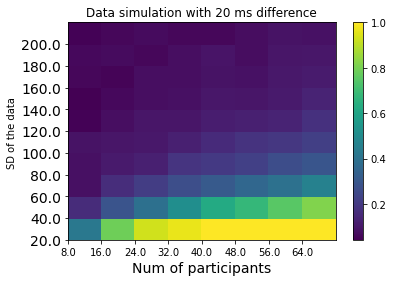

In [ ]:
plt.pcolor(Results)
plt.xticks(np.arange(len(Nums)),Nums)
plt.xlabel('Num of participants',fontsize=14)
plt.yticks(np.arange(len(SDs)),SDs,fontsize=14)
plt.ylabel('SD of the data ')

plt.colorbar()
plt.title('Data simulation with 20 ms difference')